In [ ]:
# for MAC
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
# ((訓練用圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


是什麼？ 3


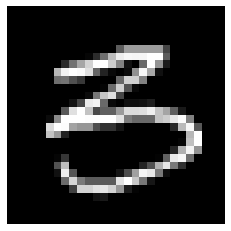

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0]-1)
plt.axis("off")
print("是什麼？", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,155,155,68,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,92,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,43,113,165,...,254,147,27,0,0,0,0,0,0,0
8,0,0,0,0,0,0,182,243,254,249,...,167,16,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,110,115,80,56,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 圖片處理:1.攤開:reshape 2.為了符合keras預期輸入：0-255 -> 0-1
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255
#x_train_reshape[c]

In [7]:
# 答案處理:多個機率(One-Hot Encoding)
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[0])
print("轉化:", y_train_cat[0])

原本: 5
轉化: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層要特別注意, input_dim
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 確定模型訓練方式
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [10]:
# batch:看多少筆資料做一次梯度下降(修正參數)
# epoch:整份資料要看幾次,決定我ˇ們何時要停止模型的訓練
# epoch 10, batch 200: 60000 * 10 / 200 = 3000次梯度下降
# 停止模型訓練: 欠擬合 -> 完美擬合 -> 過擬合 (沒有看過的資料)
# verbose: 印log幅度 1:進度條 0:完全不印 2:只印必要的
# 什麼時候停下: val_loss平滑停下
mlp.fit(x_train_reshape,
        y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 2s - loss: 0.3770 - acc: 0.8969 - val_loss: 0.1676 - val_acc: 0.9555
Epoch 2/10
 - 1s - loss: 0.1643 - acc: 0.9529 - val_loss: 0.1177 - val_acc: 0.9653
Epoch 3/10
 - 1s - loss: 0.1141 - acc: 0.9670 - val_loss: 0.0954 - val_acc: 0.9725
Epoch 4/10
 - 1s - loss: 0.0862 - acc: 0.9753 - val_loss: 0.0812 - val_acc: 0.9775
Epoch 5/10
 - 1s - loss: 0.0671 - acc: 0.9809 - val_loss: 0.0848 - val_acc: 0.9742
Epoch 6/10
 - 1s - loss: 0.0550 - acc: 0.9851 - val_loss: 0.0752 - val_acc: 0.9777
Epoch 7/10
 - 1s - loss: 0.0445 - acc: 0.9876 - val_loss: 0.0727 - val_acc: 0.9790
Epoch 8/10
 - 1s - loss: 0.0358 - acc: 0.9903 - val_loss: 0.0691 - val_acc: 0.9798
Epoch 9/10
 - 1s - loss: 0.0298 - acc: 0.9925 - val_loss: 0.0677 - val_acc: 0.9818
Epoch 10/10
 - 1s - loss: 0.0240 - acc: 0.9944 - val_loss: 0.0697 - val_acc: 0.9805


In [11]:
mlp.evaluate(x_test_reshape, y_test_cat)

10000/10000 [==============================] - 0s 17us/step


[0.06433724514928181, 0.9797]

In [13]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = mlp.predict_classes(x_test_reshape)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,967,0,2,1,1,2,2,1,3,1
1,0,1127,3,0,0,1,2,0,2,0
2,6,2,1002,4,2,0,2,5,8,1
3,0,1,5,990,0,2,0,4,2,6
4,2,0,2,1,960,0,3,2,2,10
5,2,0,0,5,1,873,4,1,2,4
6,4,2,0,1,1,3,946,0,1,0
7,2,7,8,2,0,0,0,998,1,10
8,4,0,1,1,3,5,3,2,950,5
9,1,4,0,5,6,1,1,6,1,984


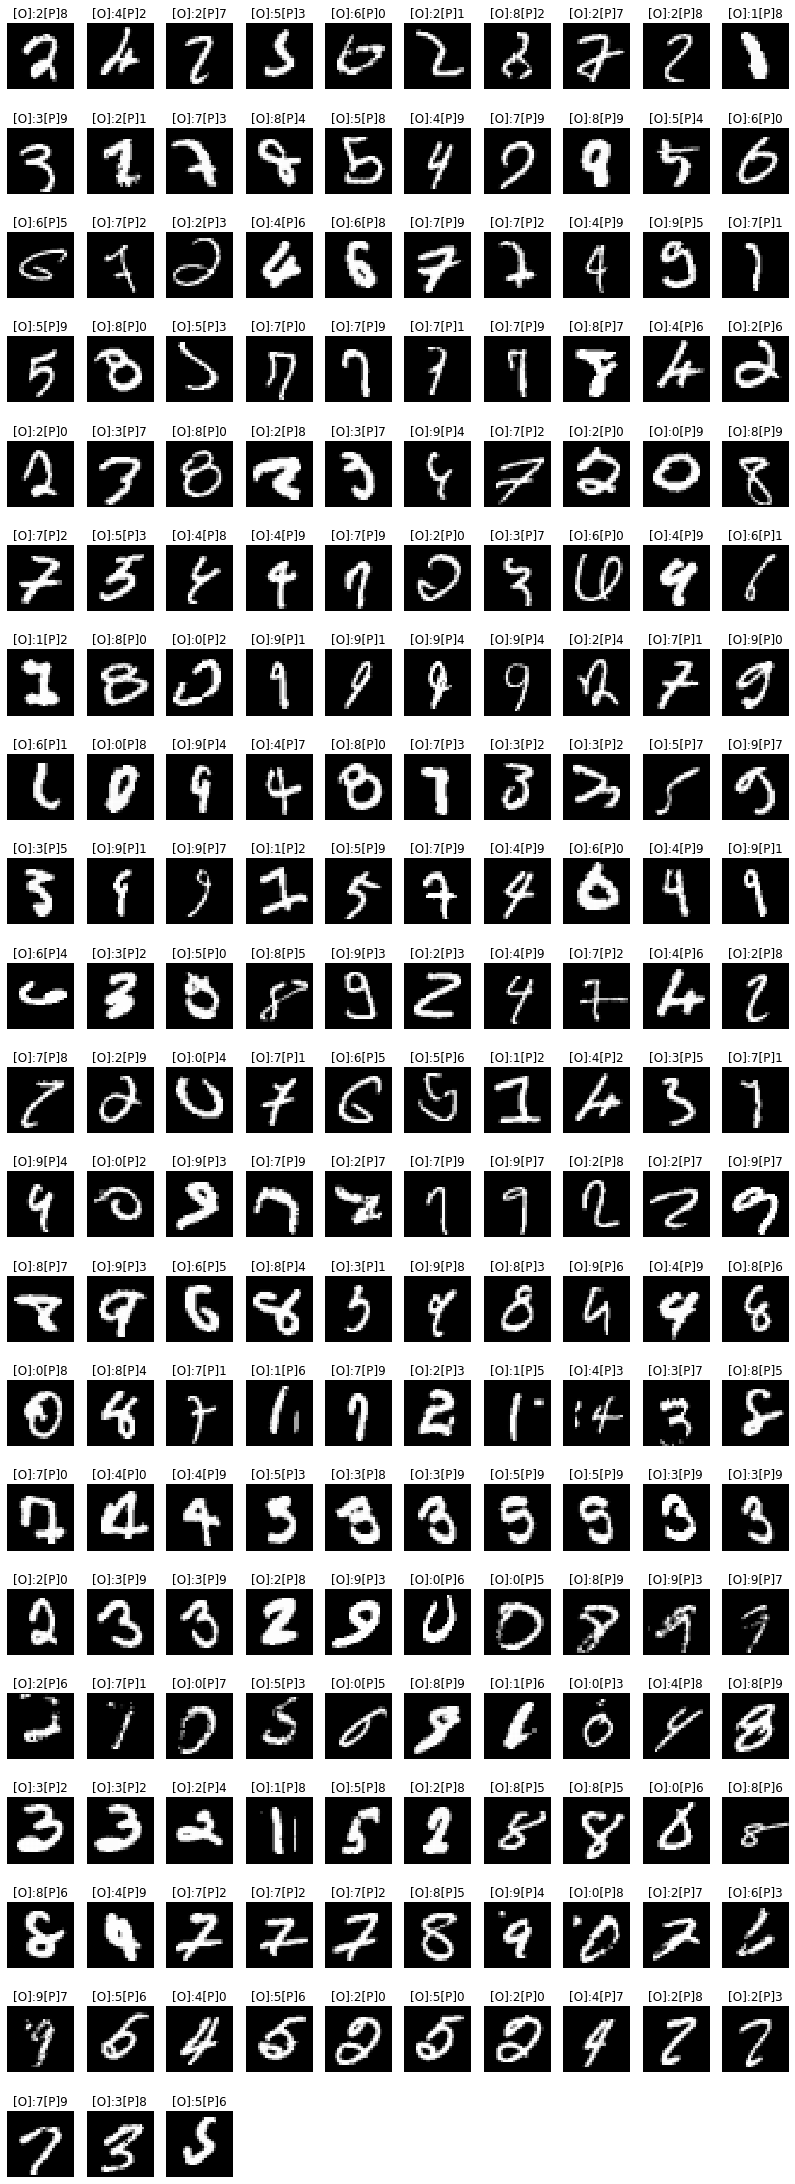

In [18]:
import numpy as np
# 找出所有不相等(預測錯誤)的位置
idx = np.nonzero(pre != y_test)
# 拿出預測錯誤的image
false_pre_img = x_test[idx]
# 拿出預測錯誤的正確答案
false_pre_right_label = y_test[idx]
# 拿出預測錯誤的預測答案
false_pre_label = pre[idx]

width = 10
height = len(false_pre_img) // 10 + 1
plt.figure(figsize=(14, 40))
for (i, img) in enumerate(false_pre_img):
    plt.subplot(height, width, i+1)
    t = ("[O]:" + str(false_pre_right_label[i]) + 
         "[P]" + str(false_pre_label[i]))
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [19]:
mlp.save("mlp.h5")

In [20]:
# https://support.hdfgroup.org/products/java/release/download.html
from keras.models import load_model
loaded = load_model("mlp.h5")
loaded.evaluate(x_test_reshape, y_test_cat)

10000/10000 [==============================] - 0s 22us/step


[0.06433724514928181, 0.9797]